**В зависимости от задачи мы можем определять:**
- что изображено (классификация)
- где находятся объекты (объектная детекция)
- какие именно пиксели принадлежат объектам (сегментация).

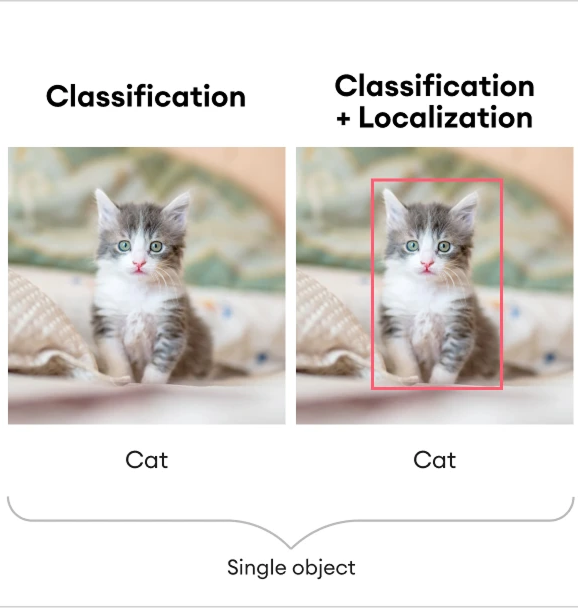
_____



**Object Detection** – это задача не только распознавания объектов, но и определения их местоположения на изображении с помощью **bounding boxes** (ограничивающих рамок).

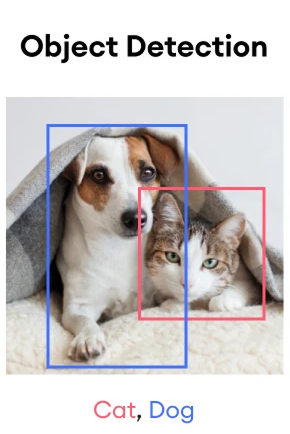
_____


**Segmentation** – это задача, при которой каждому пикселю изображения присваивается определённый класс.

**Типы сегментации:**

Семантическая сегментация (Semantic Segmentation)
Инстанс-сегментация (Instance Segmentation)
Паноптическая сегментация (Panoptic Segmentation)

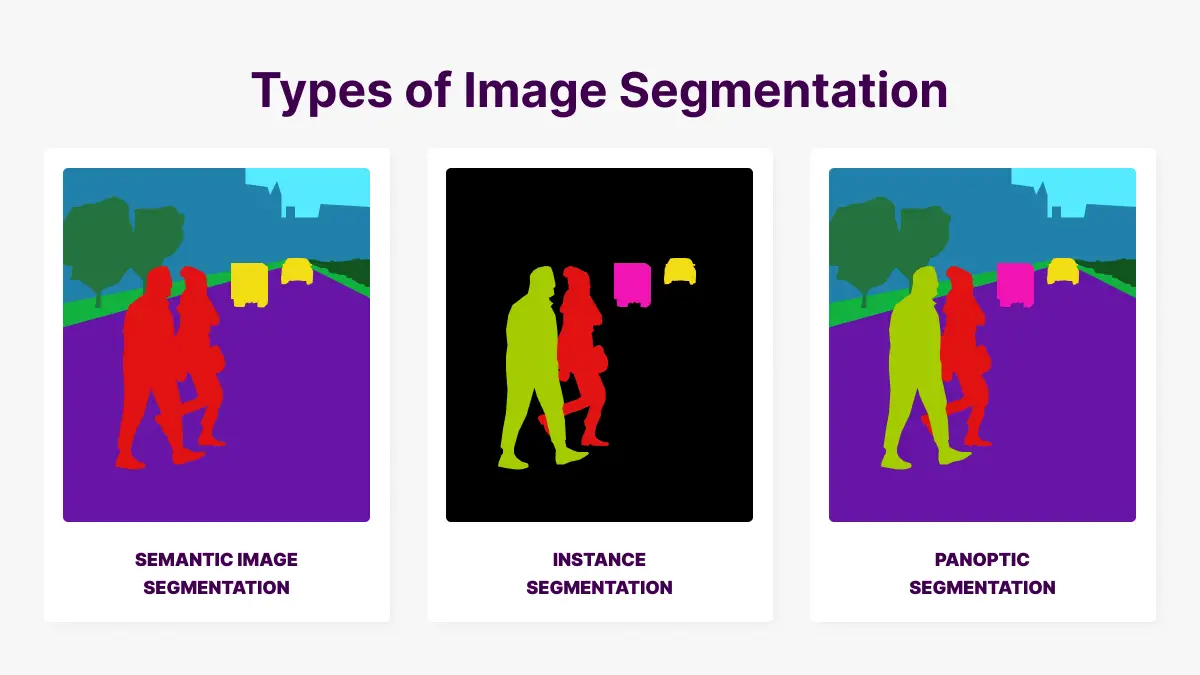

На самом деле есть еще куча всего:

https://cvexplained.wordpress.com/tag/cv-introduction/

# Традиционные методы сегментации изображений

Эти методы основаны на классических принципах обработки изображений, математических операциях и эвристиках для разделения изображения на осмысленные области.

Ключевые традиционные методы сегментации:

1. Пороговая сегментация (Thresholding)
2. Выделение границ (Edge Detection)
3. Региональные методы (Region-Based Segmentation)
4. Алгоритмы кластеризации (Clustering Algorithms)
5. Сегментация методом водораздела (Watershed Segmentation)

## Пороговая сегментация (Thresholding)

Метод основан на выборе порогового значения интенсивности пикселей. Все пиксели, яркость которых выше порога, относятся к одному классу (например, объекты), а все пиксели с интенсивностью ниже порога – к другому (например, фон).

**Виды пороговой сегментации:**
- Глобальная пороговая обработка – используется один порог для всего изображения.
- Адаптивная пороговая обработка – порог выбирается локально для разных областей изображения.
- Многопороговая сегментация – применяется несколько пороговых значений для разделения изображения на несколько классов.

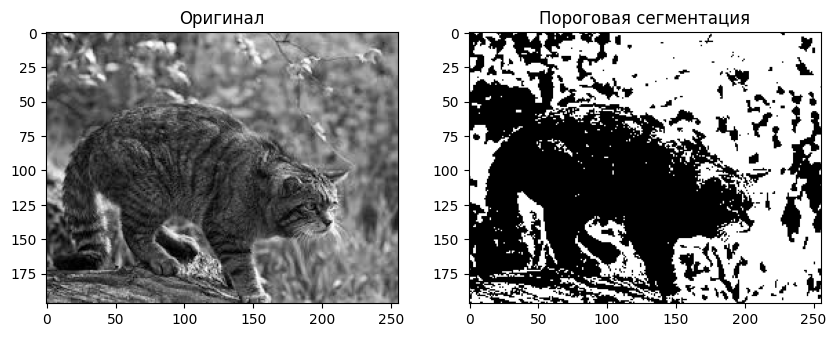

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение в градациях серого
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Применяем бинарную пороговую сегментацию
_, thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Отображаем результаты
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Оригинал')
plt.subplot(1,2,2), plt.imshow(thresh, cmap='gray'), plt.title('Пороговая сегментация')
plt.show()

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)
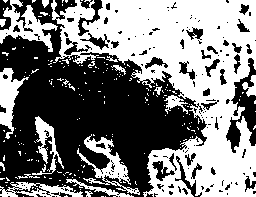

In [ ]:
# Задаем пороговое значение (например, 127 из 255).
# Пиксели выше порога превращаются в белые (255).
# Пиксели ниже порога становятся черными (0).
# В результате получается бинарное изображение с выделенным объектом.

thresh

## Выделение границ (Edge Detection)

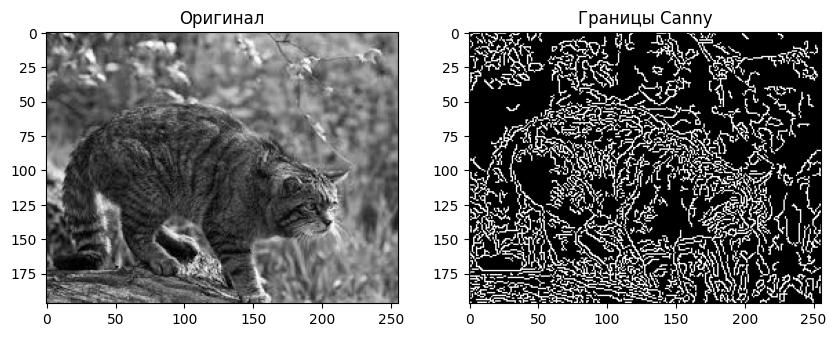

In [ ]:
# Загружаем изображение
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Применяем детектор границ Canny
edges = cv2.Canny(image, 100, 200)

# Отображаем результат
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Оригинал')
plt.subplot(1,2,2), plt.imshow(edges, cmap='gray'), plt.title('Границы Canny')
plt.show()

## Региональная сегментация (Region-Based Segmentation)

Метод основан на разбиении изображения на области и объединении похожих регионов.

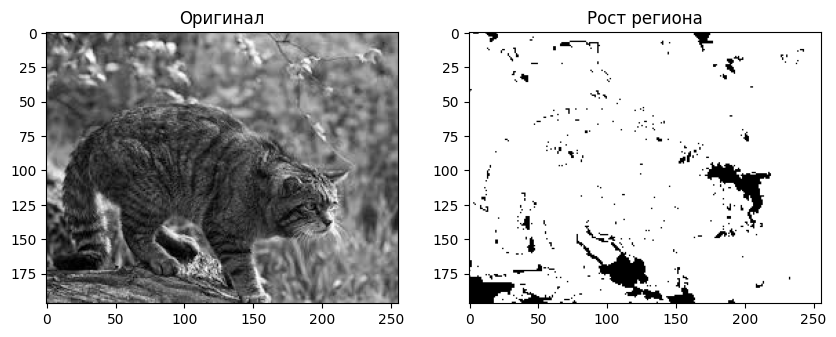

In [ ]:
def region_growing(image, seed):
    rows, cols = image.shape
    segmented = np.zeros_like(image)  # Пустая маска
    stack = [seed]  # Начальная точка
    threshold = 25  # Допустимая разница интенсивности

    while stack:
        x, y = stack.pop()
        if segmented[y, x] == 0:
            segmented[y, x] = 255  # Помечаем пиксель как часть региона
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < cols and 0 <= ny < rows and segmented[ny, nx] == 0:
                    if abs(int(image[ny, nx]) - int(image[y, x])) < threshold:
                        stack.append((nx, ny))

    return segmented

# Загружаем изображение
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

# Выбираем точку начального роста
seed = (10, 10)  # Координаты x, y

# Применяем сегментацию
segmented_image = region_growing(image, seed)

# Отображаем результат
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Оригинал')
plt.subplot(1,2,2), plt.imshow(segmented_image, cmap='gray'), plt.title('Рост региона')
plt.show()

# Кластеризация (Clustering Algorithms)

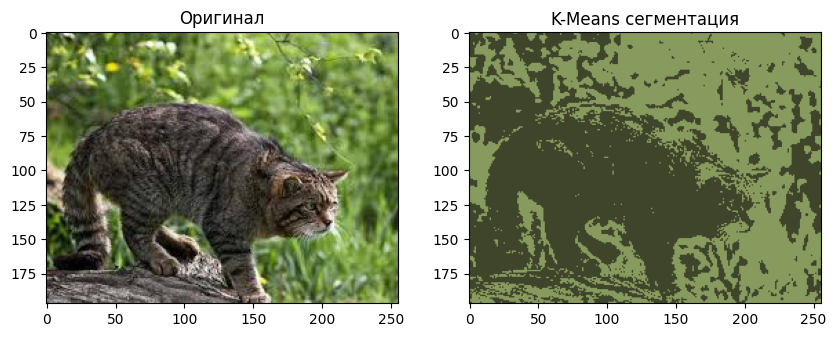

In [ ]:
# Загружаем изображение в цвете
image = cv2.imread('cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Преобразуем в двумерный массив (каждый пиксель - точка в пространстве RGB)
pixels = image.reshape((-1, 3)).astype(np.float32)

# Запускаем K-Means с 3 кластерами
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Меняем пиксели на их центроиды (уменьшаем количество цветов)
segmented_image = centers[labels.flatten()].reshape(image.shape).astype(np.uint8)

# Отображаем результат
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image), plt.title('Оригинал')
plt.subplot(1,2,2), plt.imshow(segmented_image), plt.title('K-Means сегментация')
plt.show()

In [ ]:
np.unique(labels)

array([0, 1], dtype=int32)

# Object Detection и Segmentation with Deep learning

**Архитектуры нейросетей для сегментации:**
1. U-Net (2015)

Одна из первых успешных архитектур для медицинской сегментации.

Использует кодер-декодерную структуру с пропускными соединениями (skip connections) для передачи деталей.

Плюсы: Отлично работает при небольшом количестве данных.

2. Fully Convolutional Networks (FCN)
Основана на CNN, заменяет полносвязные слои на свёрточные.

Позволяет получать карту сегментации без фиксированного размера выходных данных.

3. DeepLab (DeepLabV3+)
Использует атрозные (dilated) свёртки для учета контекста на разной глубине.

Включает CRF (Conditional Random Fields) для улучшения качества границ объектов.

4. Mask R-CNN
Расширяет Faster R-CNN, добавляя сегментационную маску для каждого объекта.

Подходит для инстансной сегментации, но сложен в обучении.